In [1]:
import os
import pickle
import logging 
from openmmtools.multistate import MultiStateReporter
import tqdm
import numpy as np

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
import matplotlib.transforms as transforms


## THR->ALA in vacuum

### Load nc file

In [9]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/10/39/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'solvent'
endstate = 0
aa = 'THR'.lower()
length = '5ns'
# with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
#     htf = pickle.load(f)


In [10]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


In [11]:
reporter.read_mixing_statistics(1)

(masked_array(
   data=[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
   mask=False,
   fill_value=999999),
 masked_array(
   data=[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       

### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [4]:
states = range(12)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [5]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 5001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 11/11 [02:21<00:00, 12.82s/it]


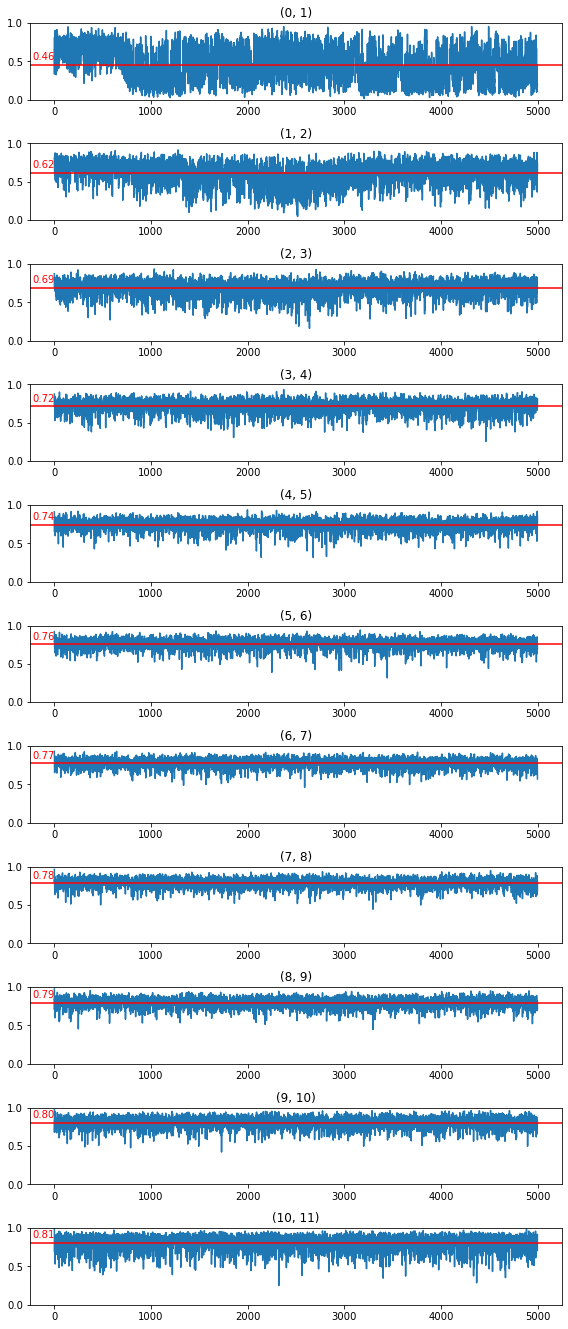

In [6]:
cols = 1
rows = 12
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Compute acceptance rates for pairs of states involving state = 0 across all iterations and plot

In [9]:
states = range(12)
states_0 = []
for first, second in zip([0]*12, states):
    states_0.append((first, second))

In [10]:
acceptance_rates_0 = []
for pair in tqdm.tqdm(states_0):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 5001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_0.append(acceptance_rates)

100%|██████████| 12/12 [03:32<00:00, 17.70s/it]


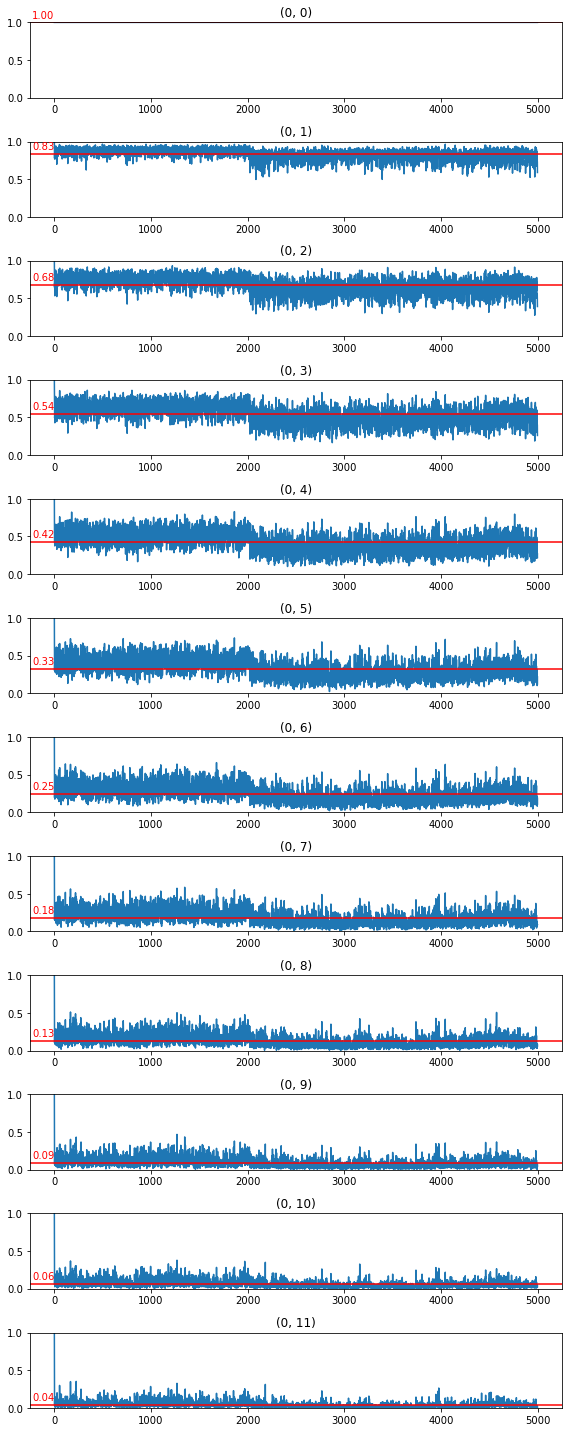

In [11]:
cols = 1
rows = 12
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(states_0, acceptance_rates_0)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Compute acceptance rates for pairs of states involving state = 10 across all iterations and plot

In [12]:
states = range(12)
states_10 = []
for first, second in zip([10]*12, states):
    states_10.append((first, second))

In [13]:
states_10

[(10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9),
 (10, 10),
 (10, 11)]

In [14]:
acceptance_rates_10 = []
for pair in tqdm.tqdm(states_10):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 5001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_10.append(acceptance_rates)

100%|██████████| 12/12 [03:06<00:00, 15.56s/it]


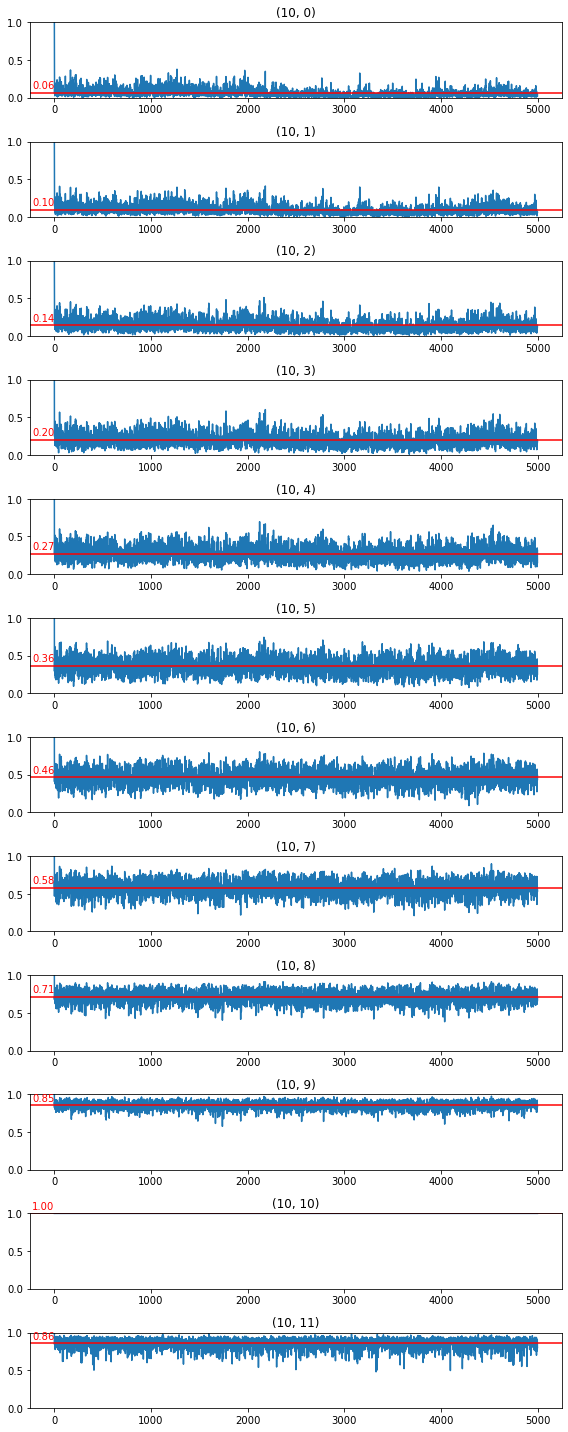

In [15]:
cols = 1
rows = 12
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(states_10, acceptance_rates_10)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

## THR->ALA in solvent

### Load nc file

In [4]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/11/1/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'solvent'
endstate = 0
aa = 'THR'.lower()
length = '5ns'
# with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
#     htf = pickle.load(f)


In [5]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [7]:
states = range(12)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [8]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 5001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 11/11 [03:20<00:00, 18.19s/it]


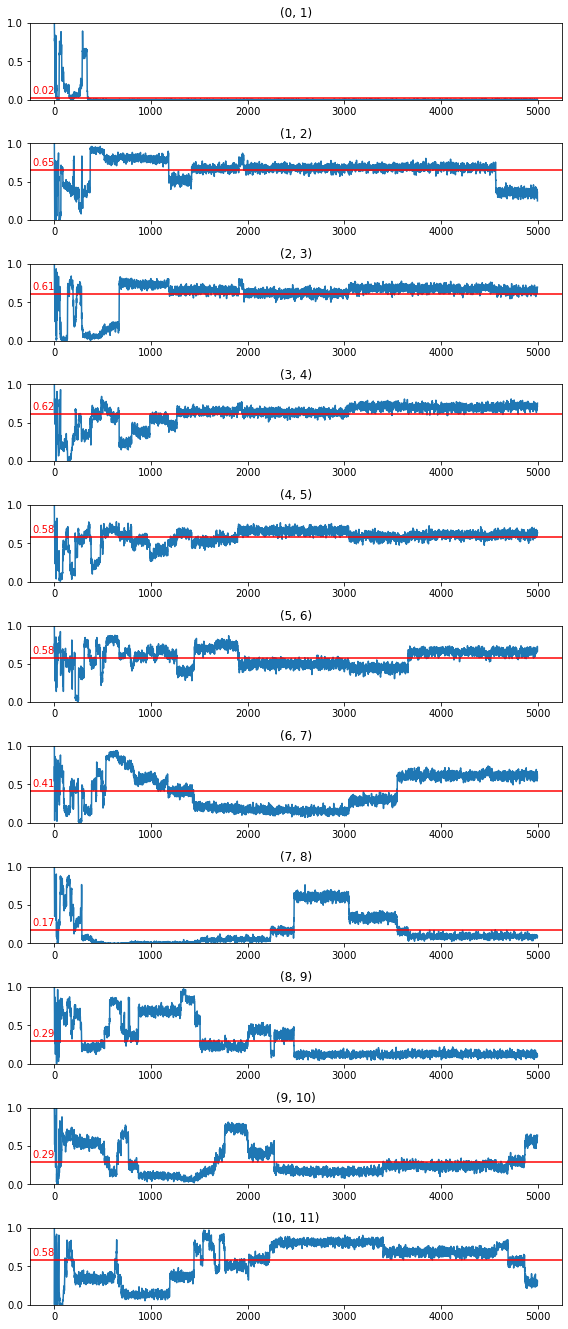

In [9]:
cols = 1
rows = 12
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Compute acceptance rates for pairs of states involving state = 0 across all iterations and plot

In [10]:
states = range(12)
states_0 = []
for first, second in zip([0]*12, states):
    states_0.append((first, second))

In [11]:
acceptance_rates_0 = []
for pair in tqdm.tqdm(states_0):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 5001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_0.append(acceptance_rates)

100%|██████████| 12/12 [03:38<00:00, 18.24s/it]


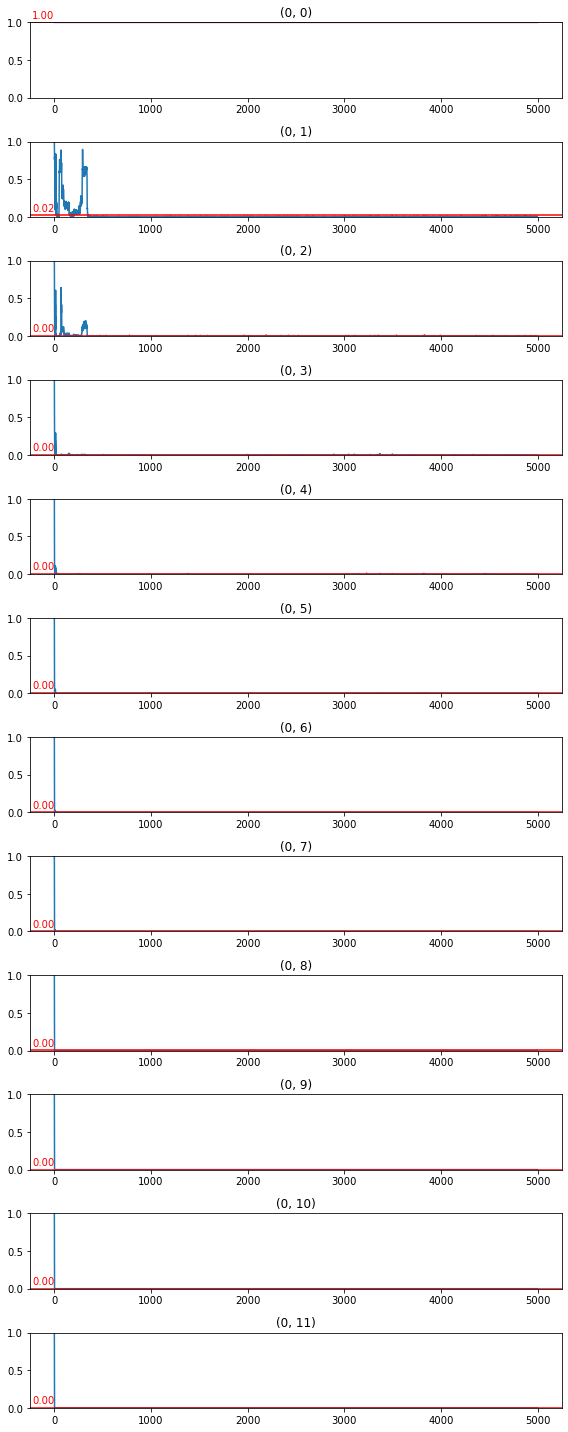

In [12]:
cols = 1
rows = 12
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(states_0, acceptance_rates_0)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

## THR->ALA in solvent (1200K)

### Load nc file

In [2]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/11/7/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'solvent'
endstate = 0
aa = 'THR'.lower()
length = '5ns'
# with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
#     htf = pickle.load(f)


In [3]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [11]:
states = range(12)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [12]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 5001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 11/11 [02:41<00:00, 14.71s/it]


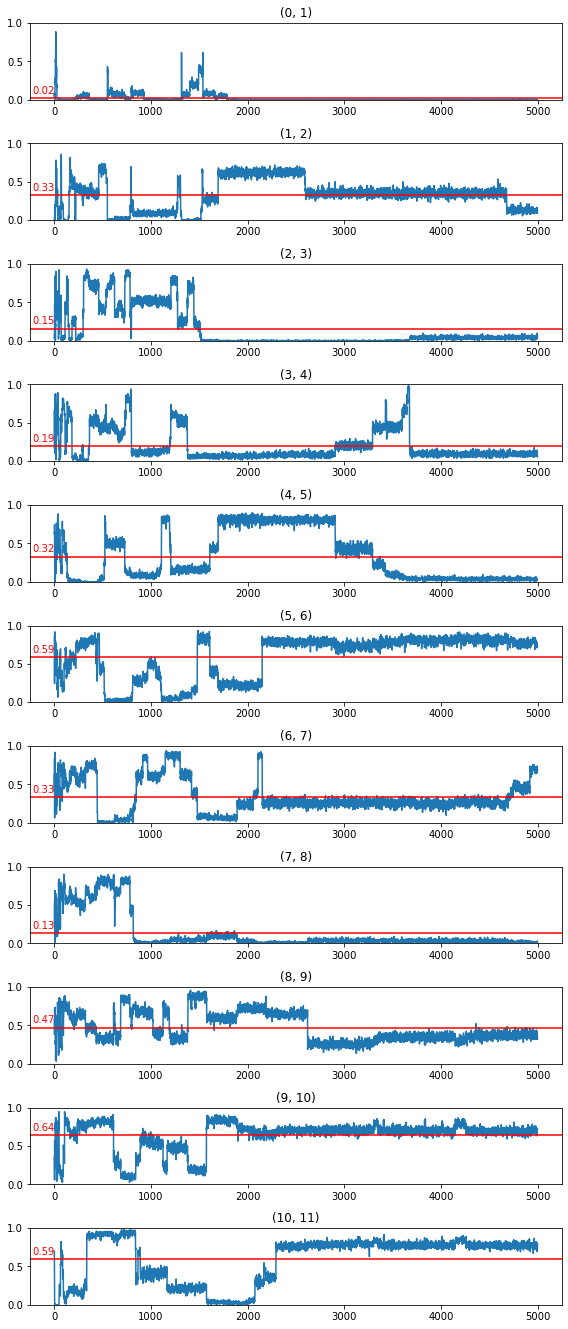

In [13]:
cols = 1
rows = 12
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Compute acceptance rates for pairs of states involving state = 0 across all iterations and plot

In [14]:
states = range(12)
states_0 = []
for first, second in zip([0]*12, states):
    states_0.append((first, second))

In [15]:
acceptance_rates_0 = []
for pair in tqdm.tqdm(states_0):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 5001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_0.append(acceptance_rates)

100%|██████████| 12/12 [03:08<00:00, 15.74s/it]


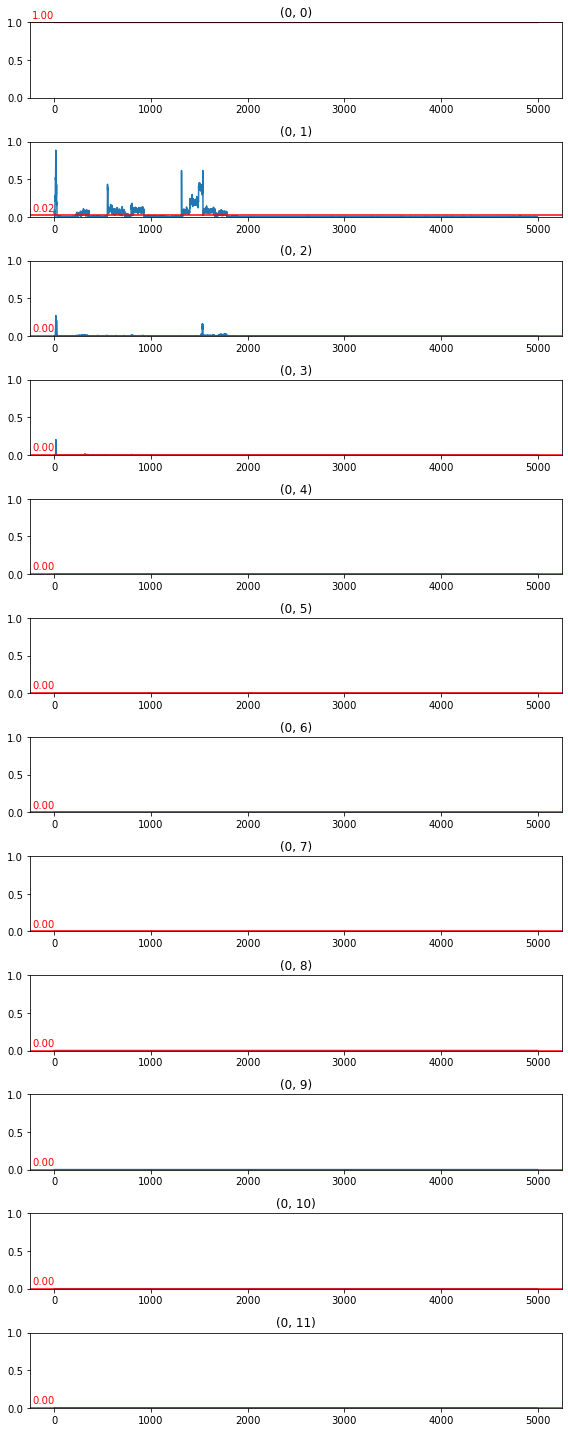

In [16]:
cols = 1
rows = 12
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(states_0, acceptance_rates_0)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

## ALA in solvent vanilla system

### Load nc file

In [10]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/11/14/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'solvent'
# endstate = 0
aa = 'ALA'.lower()
length = '5ns'
# with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
#     htf = pickle.load(f)


In [3]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [4]:
states = range(12)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [5]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 5001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 11/11 [02:01<00:00, 11.01s/it]


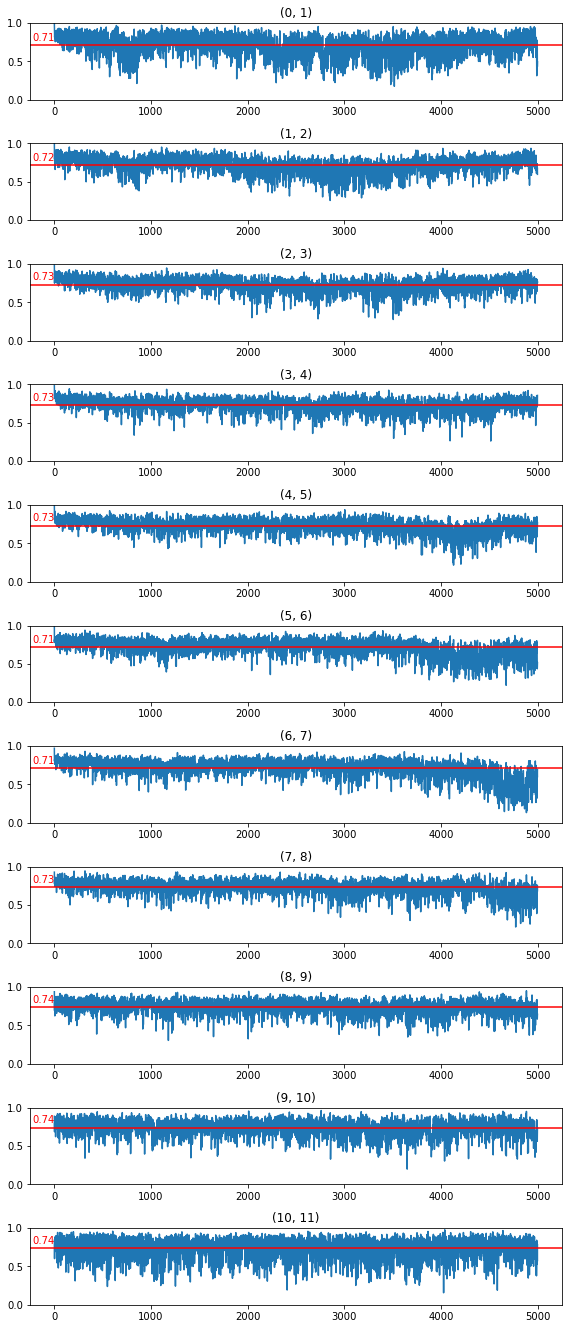

In [6]:
cols = 1
rows = 12
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Generate plots of temperature vs iteration for each of the 12 walkers

In [11]:
from perses.analysis.utils import open_netcdf
i = os.path.basename(os.path.dirname(out_dir))
nc = open_netcdf(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"))
nc_checkpoint = open_netcdf(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}_checkpoint.nc"))
checkpoint_interval = nc_checkpoint.CheckpointInterval
all_positions = nc_checkpoint.variables['positions']
n_iter, n_replicas, n_atoms, _ = np.shape(all_positions)



In [12]:
replica_trajs = []
for i in tqdm.tqdm(range(12)):
    replica_traj = []
    for iteration in range(n_iter):
        replica_traj.append(nc.variables['states'][iteration][i])
    replica_trajs.append(replica_traj)

100%|██████████| 12/12 [00:23<00:00,  1.94s/it]


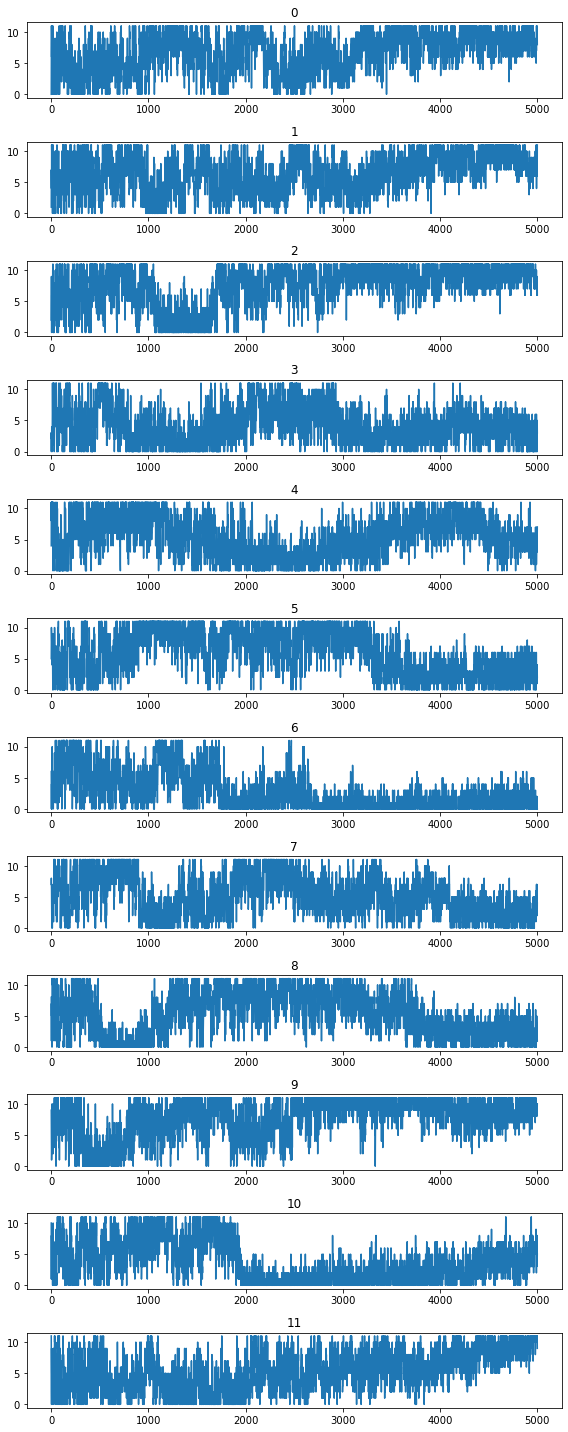

In [14]:
cols = 1
rows = 12
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, replica_traj in enumerate(replica_trajs):
    plt.subplot(gs[i,0])
    plt.plot(replica_traj)
    plt.title(i)
#     plt.ylim([298, 600])

plt.tight_layout()
plt.show()